To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 1 - Bias Variance Tradeoff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from collections import defaultdict

In [2]:
np.random.seed(400)

## 1.1

In [5]:
def f(x):
  return x+np.sin(1.5*x)
  #normal dist
mean = 0
std_dev = 0.3
#number of values
num_points = 20
# generate samples
N = np.random.normal(mean, std_dev, num_points)
x = np.sort(np.linspace(0, 10, num_points))
y = f(x) + N


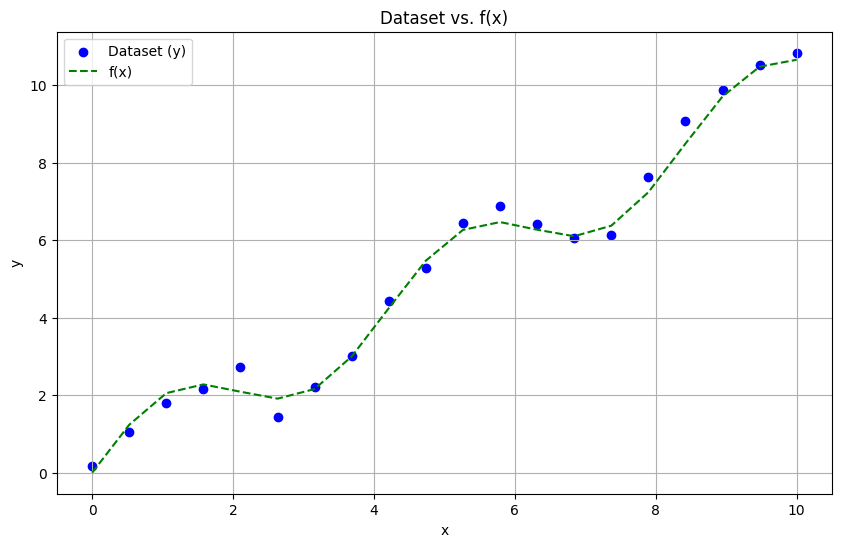

In [6]:
# Create a scatter plot for y and a smooth line plot for f(x)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dataset (y)', color='blue')
plt.plot(x, f(x), label='f(x)', color='green', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Dataset vs. f(x)')
plt.grid(True)
# Show the plot
plt.show()

**Answer:**

## 1.2

Degree 1 MSE: 0.5790083534734121
Degree 3 MSE: 0.5089407533385288
Degree 5 MSE: 0.4806441319751459
Degree 10 MSE: 0.046383854133045396


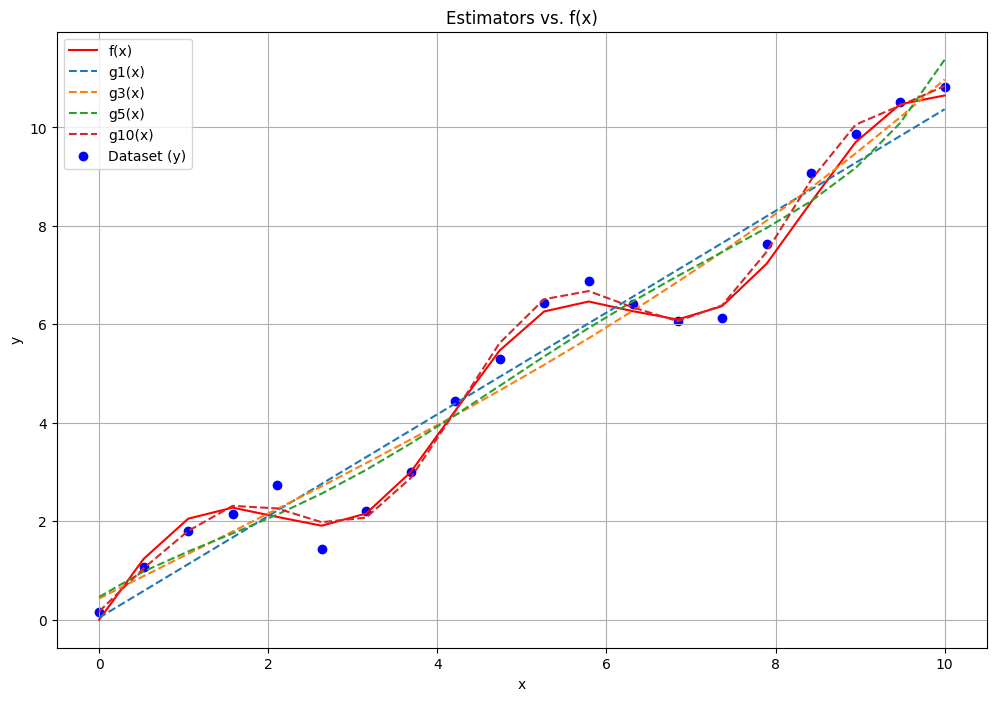

In [7]:
# Define the degrees of polynomials for the stimators
degrees = [1, 3, 5, 10]

# Create a figure for plotting
plt.figure(figsize=(12, 8))

# Plot the true function f(x)
plt.plot(x, f(x), label='f(x)', color='red')

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict using the trained model
    y_pred = model.predict(X_poly)

    # Calculate and print the Mean Squared Error (MSE) for this estimator
    mse = mean_squared_error(y, y_pred)
    print(f"Degree {degree} MSE: {mse}")

    # Plot the estimator
    plt.plot(x, y_pred, label=f'g{degree}(x)', linestyle='--')

plt.scatter(x, y, label='Dataset (y)', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Estimators vs. f(x)')
plt.grid(True)

# Show the plot
plt.show()


**Answer:** The degree ten polynomial is over fitting the model based on the MSE of 0.037 which is the closest to zero of the other polynomials, and is the most complex model. While the degree one polynomial is underfiting with a MSE of 0.488.

## 1.3

**Answer:**

### 1.3.(a)

**Answer:**

Best Model (Degree 5): Test Error = 0.10524736895170234


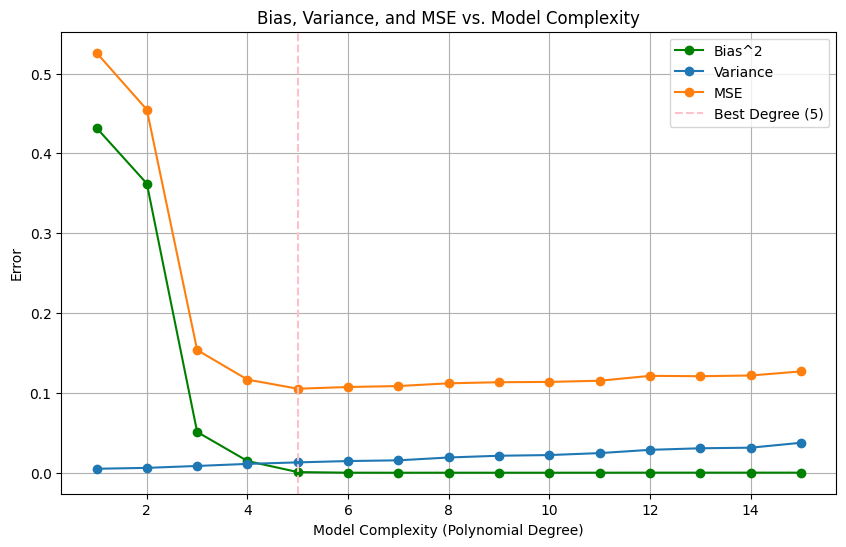

In [8]:


std = 0.3  # Gaussian noise std
num_points = 50  # size of each dataset
n_dataset = 100  # number of datasets
n_trainset = int(np.ceil(num_points * 0.8))
degrees = range(1, 16)  # model complexities

# Fixed x values
x = np.linspace(0, 5, num_points)
x = np.random.permutation(x)
x_train = x[:n_trainset]
x_test = x[n_trainset:]

# Variables
theta_hat = defaultdict(list)
pred_train = defaultdict(list)
pred_test = defaultdict(list)
train_errors = defaultdict(list)
test_errors = defaultdict(list)

def error(pred, actual):
    return (pred - actual) ** 2

# Assuming you have defined a function to generate noisy y values earlier like so:
def sample_fx_data(fx, shape, noise_std=0.3):
    return fx + np.random.randn(*shape) * noise_std

# Loop over datasets
def train_over_polynomial_degrees():
    for dataset in range(n_dataset):
        # Simulate training/testing targets
        y_train = sample_fx_data(f(x_train), x_train.shape, std)
        y_test = sample_fx_data(f(x_test), x_test.shape, std)

        # Loop over model complexities
        for degree in degrees:
            # Train model
            tmp_theta_hat = np.polyfit(x_train, y_train, degree)
            theta_hat[degree].append(tmp_theta_hat)

            # Make predictions on train set
            tmp_pred_train = np.polyval(tmp_theta_hat, x_train)
            pred_train[degree].append(tmp_pred_train)

            # Test predictions
            tmp_pred_test = np.polyval(tmp_theta_hat, x_test)
            pred_test[degree].append(tmp_pred_test)

            # Mean Squared Error for train and test sets
            train_errors[degree].append(np.mean(error(tmp_pred_train, y_train)))
            test_errors[degree].append(np.mean(error(tmp_pred_test, y_test)))

def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]
    return np.mean((average_model_prediction - f(x_test)) ** 2)

def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]
    return np.mean((pred_test - average_model_prediction) ** 2)

# Train models and calculate errors
train_over_polynomial_degrees()

# Calculate bias squared and variance
bias_squared = {}
variance = {}
for degree in degrees:
    bias_squared[degree] = calculate_estimator_bias_squared(pred_test[degree])
    variance[degree] = calculate_estimator_variance(pred_test[degree])

# Plot bias, variance, and MSE vs. model complexity
plt.figure(figsize=(10, 6))
plt.plot(degrees, list(bias_squared.values()), color='green', label='Bias^2', marker='o')
plt.plot(degrees, list(variance.values()), label='Variance', marker='o')
plt.plot(degrees, [np.mean(test_errors[degree]) for degree in degrees], label='MSE', marker='o')

# Find the best model degree with the smallest test error
best_model_degree = degrees[np.argmin([np.mean(test_errors[degree]) for degree in degrees])]
best_test_error = min([np.mean(test_errors[degree]) for degree in degrees])

# Print the best model degree and its test error
print(f'Best Model (Degree {best_model_degree}): Test Error = {best_test_error}')

# Add a dotted vertical line to identify the best model degree
plt.axvline(x=best_model_degree, color='pink', linestyle='--', label=f'Best Degree ({best_model_degree})')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Error')
plt.legend()
plt.title('Bias, Variance, and MSE vs. Model Complexity')
plt.grid(True)

# Show the plot
plt.show()


### 1.3.(b)

In [9]:
best_model_bias_squared = bias_squared[best_model_degree]
best_model_variance = variance[best_model_degree]

# Print the values
print(f'Best Model (Degree {best_model_degree}):')
print(f'Bias Squared: {best_model_bias_squared}')
print(f'Variance: {best_model_variance}')

Best Model (Degree 5):
Bias Squared: 0.0008308155042262277
Variance: 0.012982622801428418


**Answer:**

The best model for this question is a degree five polynomial because it has the lowest MSE. It has a variance of 0.0217 and a Bias sq of 0.00293.